In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear SVC Classification

In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lsvc", LinearSVC(C=1, loss='hinge', random_state=42))
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lsvc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## Non-linear SVC

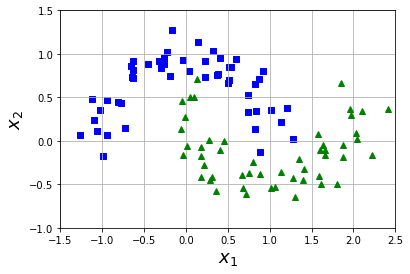

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker='s', c='b')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.ylabel(r'$x_2$', fontsize=18)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

svp = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('std', StandardScaler()),
    ('lsvc', LinearSVC(C=1, loss='hinge', random_state=42))
])

svp.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std', StandardScaler()),
                ('lsvc', LinearSVC(C=1, loss='hinge', random_state=42))])

### **OR**

In [6]:
svclp = Pipeline([
    ('std', StandardScaler()),
    ('svcp', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

svclp.fit(X, y)

Pipeline(steps=[('std', StandardScaler()),
                ('svcp', SVC(C=5, coef0=1, kernel='poly'))])

In [7]:

def plot_decision_boundary(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=.1)

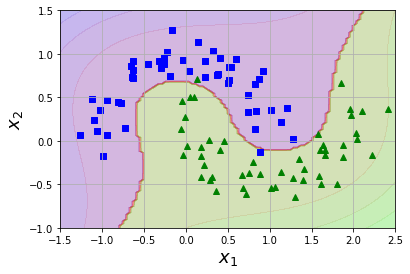

In [8]:
plot_decision_boundary(svclp, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

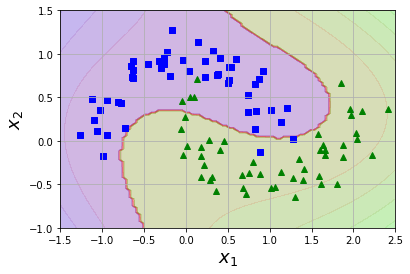

In [9]:
plot_decision_boundary(svp, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [10]:
from sklearn.svm import SVR

svr = SVR(kernel='poly', degree=2, C=100, epsilon=.1, gamma='scale')
svr.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [11]:
from sklearn.metrics import accuracy_score, precision_score

In [12]:
y_pred = svr.predict(X)

In [13]:
print("accuracy :", accuracy_score(y, y_pred))
print("precision :", precision_score(y, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [16]:
y[:4], y_pred[:4]

(array([1, 1, 1, 0], dtype=int64),
 array([0.90189074, 0.61549532, 0.8241996 , 0.94118635]))

In [18]:
svr.decision_function(X[:4])

AttributeError: 'SVR' object has no attribute 'decision_function'